In [1]:
%cd "C:\Users\Angela\OneDrive\Desktop\ANA680

C:\Users\Angela\OneDrive\Desktop\ANA680


# Stage 1. Understanding The Problem
Predict Customer Churn

# Stage 2. Data Ingestion/Loading

In [2]:
# Import Packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset

churnDF = pd.read_csv('Churn_Modelling.csv')

# Stage 3. Data Evaluation & Exploration

In [4]:
# fine the number of rows and columns
churnDF.shape  

(10000, 14)

In [5]:
# List a few observations from the top
churnDF.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [6]:
# list the name of features, how many features?
churnDF.columns 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# Check Stats per feature
churnDF.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

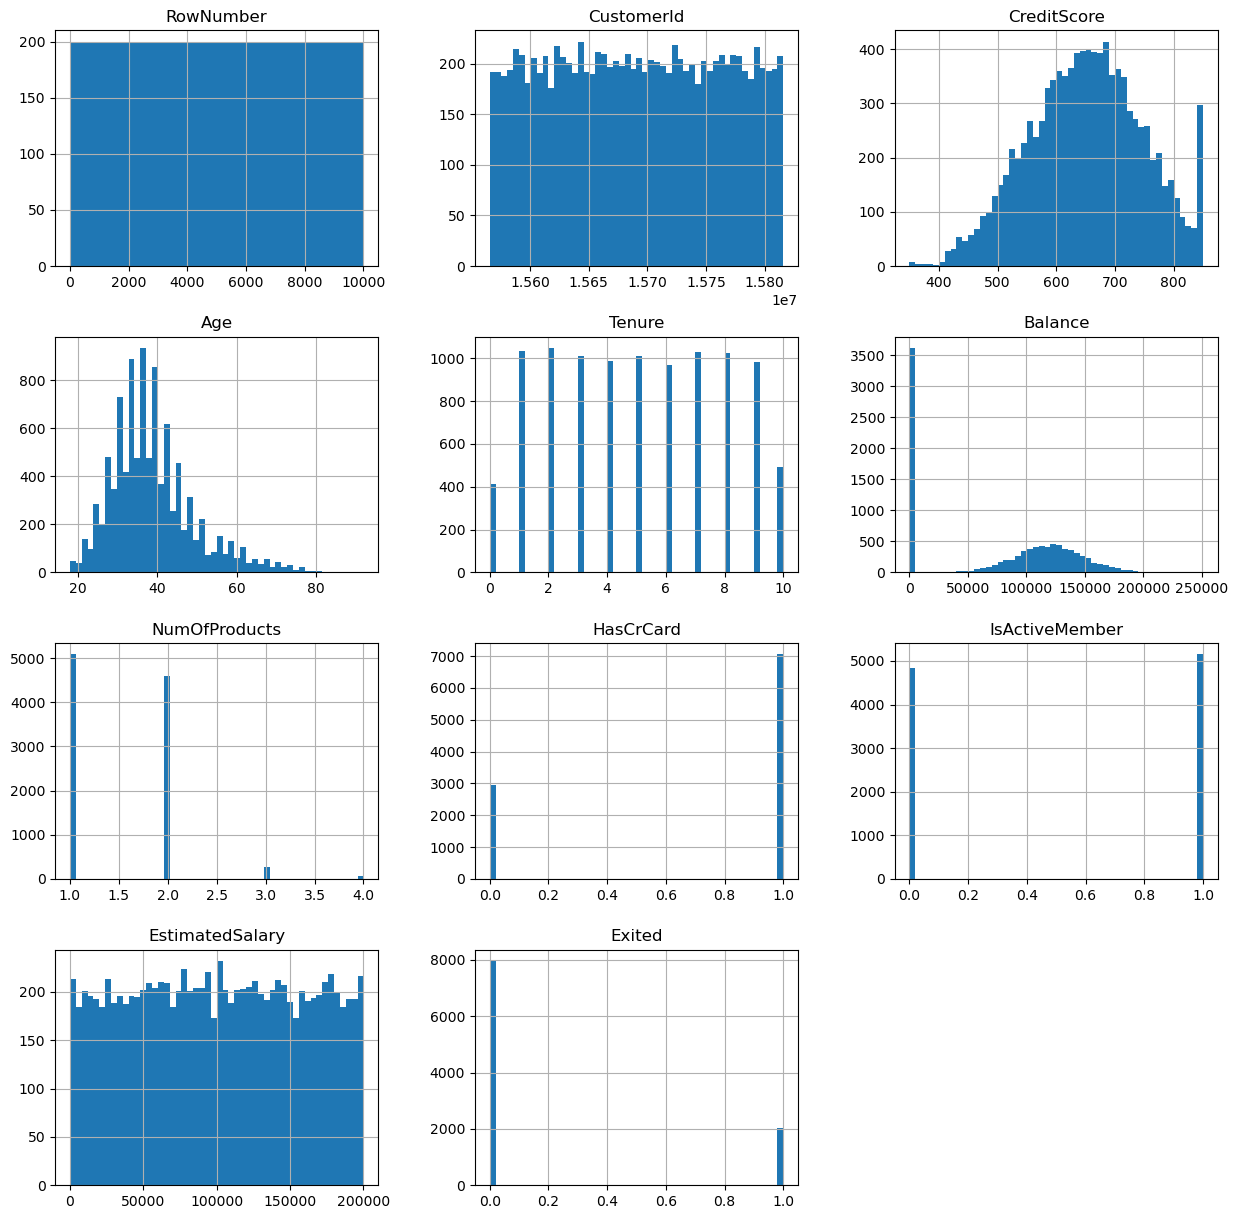

In [8]:
# histogram to check feature distributions
churnDF.hist(bins=50, figsize=(15, 15))

In [9]:
#number of unique values in each feature
churnDF.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Not going to use Surname,RowNumber, or CustomerID -> drop
churnDF = churnDF.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

In [11]:
# Recode Geography 0 = France, 1 = Germany to 3 = Spain
def recode(Geography):
    if Geography == "France":
        return 0
    elif Geography == "Germany":
        return 1
    else:
        return 3
    
churnDF['Geography'] = churnDF['Geography'].apply(recode)
churnDF.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,3,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1


In [12]:
# Recode Gender, 0 = Female, 1 = Male
def recode_gen(Gender):
    if Gender == "Female":
        return 0
    else:
        return 1
    
churnDF['Gender'] = churnDF['Gender'].apply(recode_gen)
churnDF.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [13]:
# Check for missing values
print(churnDF.isnull().sum().sort_values(ascending=False).to_string())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0


In [14]:
# Find Top Features related to Exited
corr=churnDF.corr()

print("Most postively correlated features with the target")
corr.sort_values(['Exited'], ascending=False, inplace=True)
corr.Age

Most postively correlated features with the target


Exited             0.285323
Age                1.000000
Balance            0.028308
EstimatedSalary   -0.007201
Geography          0.014857
HasCrCard         -0.011721
Tenure            -0.009997
CreditScore       -0.003965
NumOfProducts     -0.030680
Gender            -0.027544
IsActiveMember     0.085472
Name: Age, dtype: float64

In [15]:
# Separate features (X) and target (y) variable
X = churnDF.copy()
y = churnDF['Exited'].copy()

In [16]:
# Split Test, Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
#Design the ANN 
ann_model = keras.models.Sequential([
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(15, activation='sigmoid'),
    keras.layers.Dense(1, activation = "sigmoid")
])

In [18]:
# Compile the model
ann_model.compile(optimizer = Adam(learning_rate = 0.01),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [19]:
# Train the model
ann_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5016 - accuracy: 0.7968
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5052 - accuracy: 0.7968
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4994 - accuracy: 0.7968
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4988 - accuracy: 0.7968
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7968
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4988 - accuracy: 0.7968
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4989 - accuracy: 0.7968
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4986 - accuracy: 0.7968
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4994 - accuracy: 0.7968
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4992 - accuracy: 0.7968

In [20]:
# Evaluate Model
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)

print("The ANN Model Loss is: ", ann_loss)
print("The ANN Model Accuracy is: ", ann_accuracy)

63/63 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.7945
The ANN Model Loss is:  0.4981124997138977
The ANN Model Accuracy is:  0.7944999933242798
